<a href="https://colab.research.google.com/github/Andrestrouble13/Practica-7/blob/main/Practica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andresaguilar13","key":"424de54fcb602bbbaf6a16d7943bf840"}'}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download sarahtaha/1025-pokemon

Dataset URL: https://www.kaggle.com/datasets/sarahtaha/1025-pokemon
License(s): CC-BY-NC-SA-4.0


In [5]:
import zipfile
with zipfile.ZipFile('1025-pokemon.zip','r') as zip_ref:
  zip_ref.extractall("pokemon_data")

In [6]:
import pandas as pd
df = pd.read_csv('pokemon_data/all_pokemon_data.csv')
df.head()

,Name,National Dex #,Primary Typing,Secondary Typing,Secondary Typing Flag,Generation,Legendary Status,Form,Alt Form Flag,Evolution Stage,...,Weight (hg),Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
0,bulbasaur,1,grass,poison,True,generation-i,False,Base,False,1,...,69,28,15,318,45,49,49,65,65,45
1,ivysaur,2,grass,poison,True,generation-i,False,Base,False,2,...,130,39,29,405,60,62,63,80,80,60
2,venusaur,3,grass,poison,True,generation-i,False,Base,False,3,...,1000,79,220,525,80,82,83,100,100,80
3,venusaur-mega,3,grass,poison,True,generation-i,True,Mega,True,3,...,1555,94,343,625,80,100,123,122,120,80
4,charmander,4,fire,NaN,False,generation-i,False,Base,False,1,...,85,24,19,309,39,52,43,60,50,65


# **Seccion 1: Medidas Descriptivas**

Instrucciones
1. Responde todas las preguntas apoyandote en analisis estadıstico y visual.
2. Justifica tus respuestas con codigo, resultados e interpretaciones.
3. Puedes incluir nuevas visualizaciones si consideras que ayudan a reforzar tu analisis.

Seccion 1: Medidas Descriptivas
1. Calcula la media, mediana y moda de la variable Attack.
¿La distribucion parece simetrica?
¿Hay diferencias significativas entre media y mediana?
2. Calcula la desviacion estandar y el rango de Speed para Pokemon legendarios y no legendarios.¿Que grupo presenta mayor variabilidad? ¿Existen outliers relevantes?

Media: 80.98902027027027
Mediana: 80.0
Moda: [100]
Rango: 185
Desviación estándar: 31.95533729746919
Varianza: 1021.1435817950254


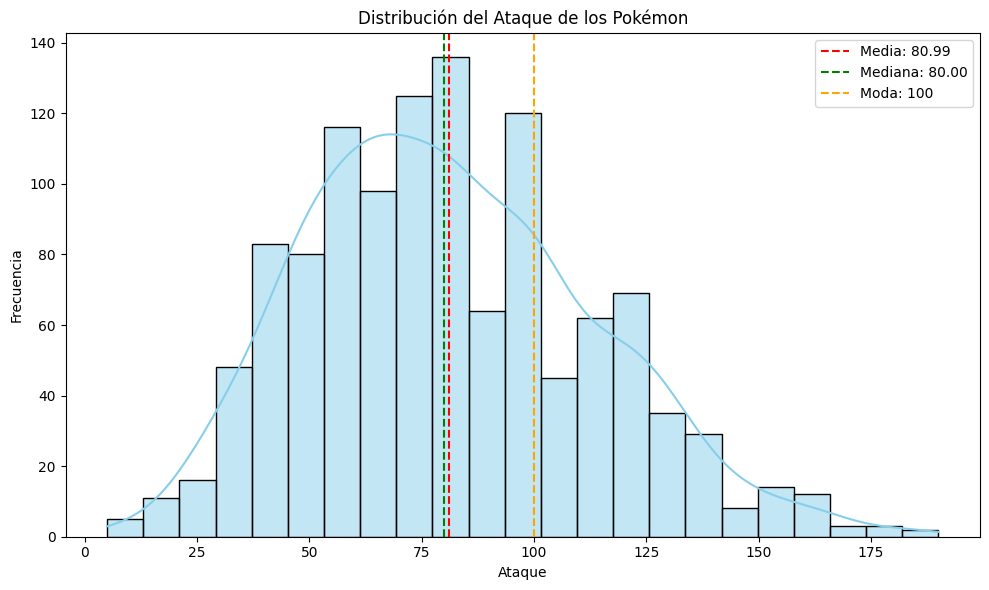

In [9]:
#1. Calcula la media, mediana y moda de la variable Attack. ¿La distribucion parece simetrica?

media = df['Attack'].mean()
mediana = df['Attack'].median()
moda = df['Attack'].mode().tolist()
rango = df['Attack'].max() - df['Attack'].min()
desviacion = df['Attack'].std()
varianza = df['Attack'].var()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)
print("Rango:", rango)
print("Desviación estándar:", desviacion)
print("Varianza:", varianza)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Attack'] = pd.to_numeric(df['Attack'], errors='coerce')

attack_values = df['Attack'].dropna()

media = attack_values.mean()
mediana = attack_values.median()
moda = attack_values.mode().iloc[0]

plt.figure(figsize=(10, 6))
sns.histplot(attack_values, kde=True, color='skyblue')
plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color='orange', linestyle='--', label=f'Moda: {moda}')
plt.title('Distribución del Ataque de los Pokémon')
plt.xlabel('Ataque')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

📊 Interpretación:
La media y la mediana son bastante cercanas, lo que sugiere una distribución aproximadamente simétrica.

La moda es 100, lo que indica que hay varios Pokémon con ese valor de ataque (probablemente muchos con base 100).

En la gráfica podemos ver una distribución con ligera asimetría positiva (hacia la derecha), pero no es extrema.
Por tanto, no hay diferencias significativas entre la media y la mediana.

📊 Desviación estándar de Speed:
  - Legendarios: 29.55
  - No legendarios: 27.44

📊 Rango de Speed:
  - Legendarios: 187
  - No legendarios: 155


<ipython-input-20-dec910f81fbf>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Legendary", y="Speed", data=df, palette="Set2")


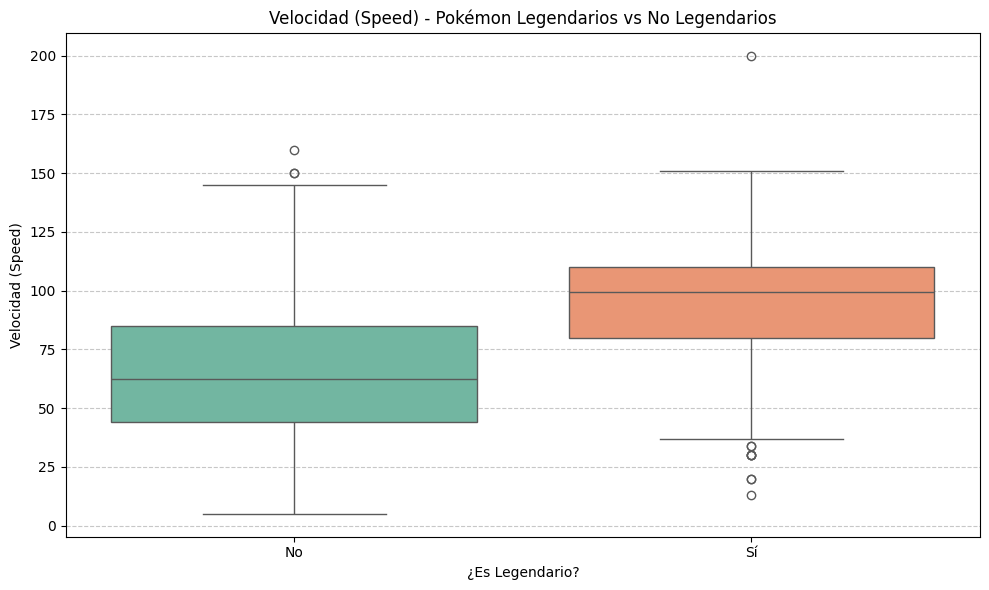

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df.rename(columns={"Legendary Status": "Legendary"}, inplace=True)
df["Speed"] = pd.to_numeric(df["Speed"], errors="coerce")
df["Legendary"] = df["Legendary"].astype(bool)


legendarios = df[df["Legendary"]]
no_legendarios = df[~df["Legendary"]]


desv_std_legendarios = legendarios["Speed"].std()
desv_std_no_legendarios = no_legendarios["Speed"].std()
rango_legendarios = legendarios["Speed"].max() - legendarios["Speed"].min()
rango_no_legendarios = no_legendarios["Speed"].max() - no_legendarios["Speed"].min()


print("📊 Desviación estándar de Speed:")
print(f"  - Legendarios: {desv_std_legendarios:.2f}")
print(f"  - No legendarios: {desv_std_no_legendarios:.2f}")

print("\n📊 Rango de Speed:")
print(f"  - Legendarios: {rango_legendarios}")
print(f"  - No legendarios: {rango_no_legendarios}")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Legendary", y="Speed", data=df, palette="Set2")
plt.title("Velocidad (Speed) - Pokémon Legendarios vs No Legendarios")
plt.xlabel("¿Es Legendario?")
plt.ylabel("Velocidad (Speed)")
plt.xticks([0, 1], ["No", "Sí"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


📌 Interpretación
¿Qué grupo presenta mayor variabilidad?
Aunque las desviaciones estándar son similares, los no legendarios tienen un rango mayor, indicando mayor variabilidad en velocidad.

Esto es coherente con la gran diversidad de Pokémon no legendarios: algunos son extremadamente lentos y otros muy rápidos.

¿Existen outliers relevantes?
Sí. El análisis visual mediante boxplot revela outliers altos (Pokémon muy rápidos) especialmente en no legendarios.



In [21]:
#3. Para cada Primary Typing, calcula el promedio y la desviaci ́on est ́andar de Health.¿Que tipo tiene la mayor vida promedio? ¿Cual muestra mayor dispersion?

import pandas as pd

health_stats = df.groupby('Primary Typing')['Health'].agg(['mean', 'std']).reset_index()

highest_avg_health = health_stats.loc[health_stats['mean'].idxmax()]

highest_std_health = health_stats.loc[health_stats['std'].idxmax()]

print("Promedio y desviación estándar de Health por tipo primario:\n")
print(health_stats.sort_values(by='mean', ascending=False))

print("\nTipo con mayor vida promedio:")
print(highest_avg_health)

print("\nTipo con mayor dispersión en Health:")
print(highest_std_health)

Promedio y desviación estándar de Health por tipo primario:

   Primary Typing       mean        std
2          dragon  84.625000  35.229113
12         normal  78.234375  34.751193
5        fighting  75.740000  25.724450
11            ice  75.190476  26.450357
14        psychic  74.818182  29.110374
10         ground  73.565217  28.884177
1            dark  72.929825  31.126963
4           fairy  72.129032  22.367748
13         poison  72.062500  23.212622
17          water  71.806897  27.271856
16          steel  70.767442  20.690275
6            fire  70.623377  18.877053
7          flying  70.000000  19.880895
15           rock  67.422535  21.244604
9           grass  67.318584  19.725466
3        electric  63.549296  19.510282
8           ghost  62.102564  26.060451
0             bug  57.179775  17.467868

Tipo con mayor vida promedio:
Primary Typing       dragon
mean                 84.625
std               35.229113
Name: 2, dtype: object

Tipo con mayor dispersión en Health:
Pri

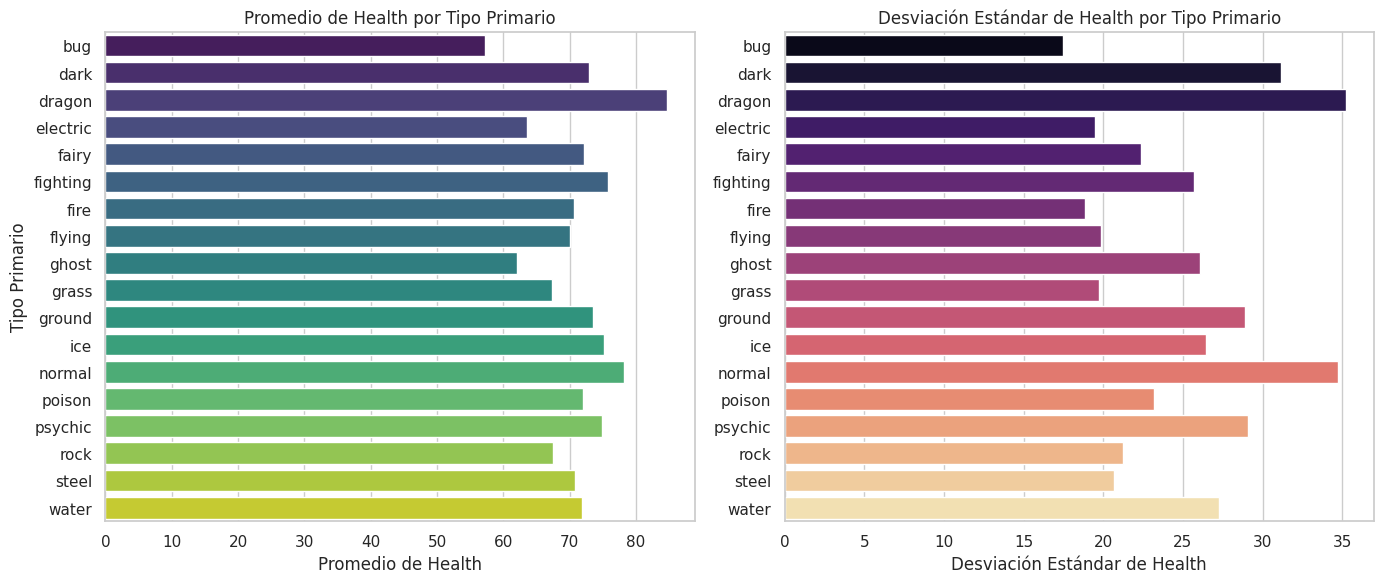

In [23]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

health_stats = df.groupby('Primary Typing')['Health'].agg(['mean', 'std']).reset_index()


sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

# Gráfica 1: Promedio de Health por tipo
plt.subplot(1, 2, 1)
sns.barplot(data=health_stats, x='mean', y='Primary Typing', hue='Primary Typing', palette='viridis', legend=False)
plt.title('Promedio de Health por Tipo Primario')
plt.xlabel('Promedio de Health')
plt.ylabel('Tipo Primario')

# Gráfica 2: Desviación estándar de Health por tipo
plt.subplot(1, 2, 2)
sns.barplot(data=health_stats, x='std', y='Primary Typing', hue='Primary Typing', palette='magma', legend=False)
plt.title('Desviación Estándar de Health por Tipo Primario')
plt.xlabel('Desviación Estándar de Health')
plt.ylabel('')

plt.tight_layout()
plt.show()


¿Qué tipo tiene la mayor vida promedio?

Dragon con un promedio de 84.63 puntos de salud.

¿Cuál muestra mayor dispersión en la vida (desviación estándar)?

También Dragon, con una desviación estándar de 35.23, indicando la mayor variabilidad en sus valores de Health.

# **Seccion 2: Visualizacion de Datos**

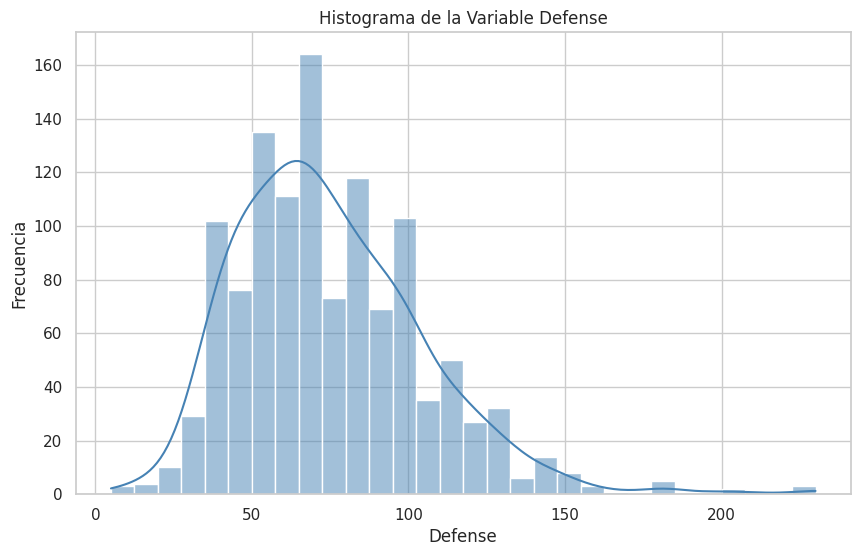

Estadísticas descriptivas de Defense:

count    1184.000000
mean       74.817568
std        30.324208
min         5.000000
25%        52.000000
50%        70.000000
75%        91.000000
max       230.000000
Name: Defense, dtype: float64

Sesgo (Skewness): 1.02
Curtosis: 2.25


In [24]:
#4. Elabora un histograma de la variable Defense.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df['Defense'], bins=30, kde=True, color='steelblue')
plt.title('Histograma de la Variable Defense')
plt.xlabel('Defense')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Cálculos estadísticos
defense_description = df['Defense'].describe()
skewness = df['Defense'].skew()
kurtosis = df['Defense'].kurt()

# Mostrar resultados
print("Estadísticas descriptivas de Defense:\n")
print(defense_description)
print(f"\nSesgo (Skewness): {skewness:.2f}")
print(f"Curtosis: {kurtosis:.2f}")


La gráfica muestra una distribución sesgada positivamente (a la derecha): hay más valores concentrados en el rango bajo-medio, pero también existen algunos Pokémon con defensas muy altas que alargan la cola derecha.

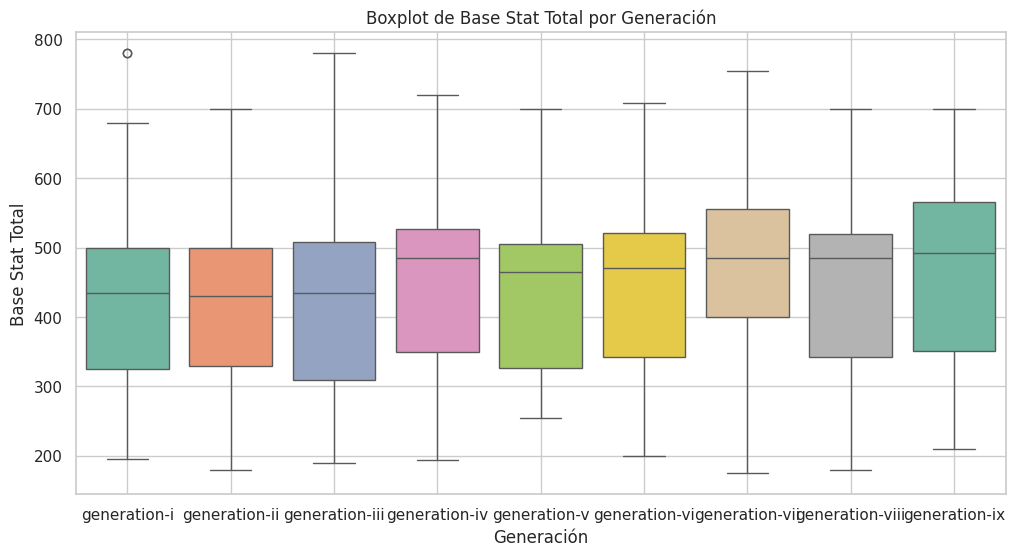

Medianas por generación (Base Stat Total):

Generation
generation-ix      492.5
generation-vii     485.0
generation-iv      485.0
generation-viii    485.0
generation-vi      471.0
generation-v       465.0
generation-i       435.0
generation-iii     435.0
generation-ii      430.0
Name: Base Stat Total, dtype: float64

Generación con más outliers: generation-i (2 outliers)


In [26]:
#5.Genera un boxplot de la variable Base Stat Total por Generation.¿Cual generacion tiene la mediana m ́as alta? ¿Que generacion tiene mas outliers?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Boxplot de Base Stat Total por Generación
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='Generation',
    y='Base Stat Total',
    hue='Generation',
    palette='Set2',
    legend=False
)
plt.title('Boxplot de Base Stat Total por Generación')
plt.xlabel('Generación')
plt.ylabel('Base Stat Total')
plt.grid(True)
plt.show()

# Cálculo de la mediana por generación
medians_by_gen = df.groupby('Generation')['Base Stat Total'].median().sort_values(ascending=False)
print("Medianas por generación (Base Stat Total):\n")
print(medians_by_gen)

# Cálculo de outliers por generación
outliers_by_gen = {}
for gen, group in df.groupby('Generation'):
    q1 = group['Base Stat Total'].quantile(0.25)
    q3 = group['Base Stat Total'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = group[(group['Base Stat Total'] < lower_bound) | (group['Base Stat Total'] > upper_bound)]
    outliers_by_gen[gen] = len(outliers)

# Generación con más outliers
most_outliers_gen = max(outliers_by_gen, key=outliers_by_gen.get)
print(f"\nGeneración con más outliers: {most_outliers_gen} ({outliers_by_gen[most_outliers_gen]} outliers)")


🥇 Generación IX con una mediana de 492.5
Esto indica que, en esta generación, al menos la mitad de los Pokémon tienen un Base Stat Total superior a cualquier otra generación. ¿Te gustaría ver un top de los Pokémon más fuertes de esa generación?
🥇 Generación con más outliers: generation-i (2 outliers)

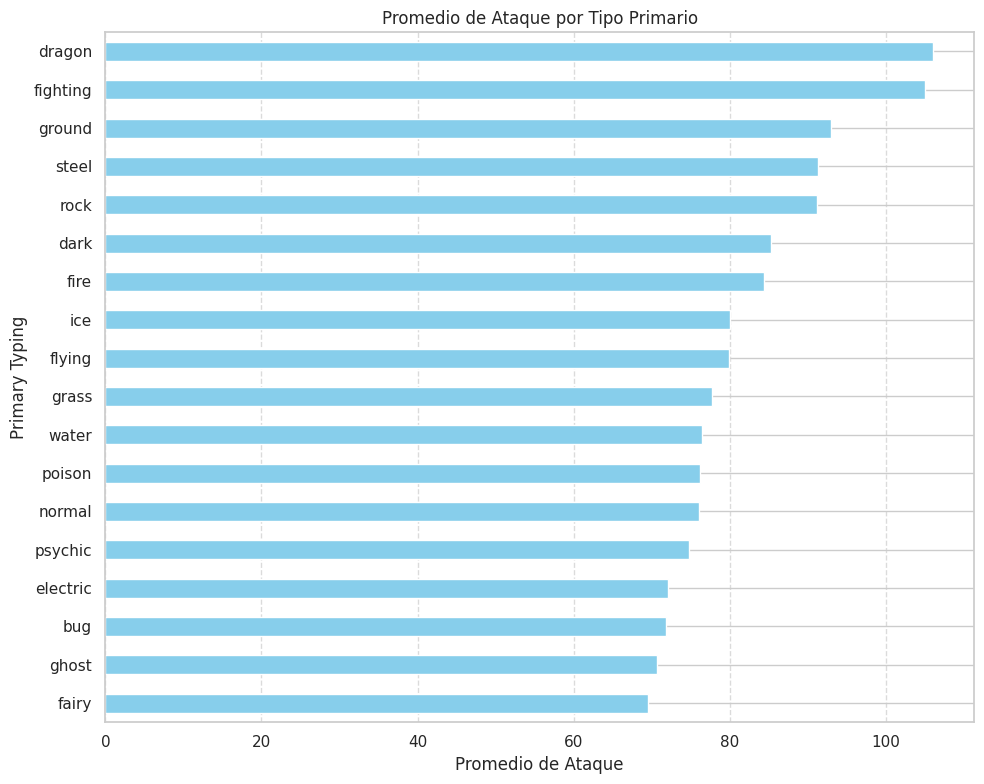

In [27]:
#6.Crea un grafico de barras horizontales con el promedio de Attack por Primary Typing.¿Cuales son los tres tipos con mayor promedio de ataque?¿Que podrıas concluir respecto al diseno del juego?

import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por "Primary Typing" y calcular el promedio de "Attack"
attack_avg_by_type = df.groupby("Primary Typing")["Attack"].mean().sort_values(ascending=True)

# Graficar
plt.figure(figsize=(10, 8))
attack_avg_by_type.plot(kind='barh', color='skyblue')
plt.xlabel('Promedio de Ataque')
plt.title('Promedio de Ataque por Tipo Primario')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Los tres tipos primarios con mayor promedio de ataque son:

Dragon – 105.98

Fighting – 104.96

Ground – 92.98

Conclusión sobre el diseño del juego:
Estos resultados sugieren que los tipos Dragon y Fighting han sido diseñados para tener un rol ofensivo fuerte en combate, probablemente para destacar su poder en batallas cuerpo a cuerpo o con movimientos de alta potencia. Esto puede reflejar una intención de los desarrolladores de que estos tipos sean dominantes o raros, reforzando su prestigio o dificultad de obtención en el juego.

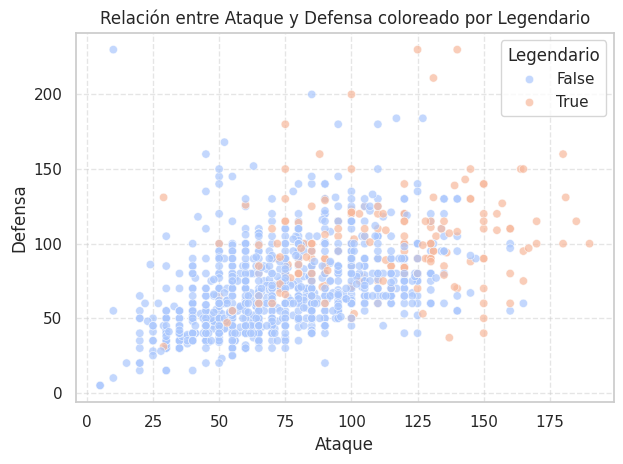

In [31]:
#7. Elabora un gr ́afico de dispersi ́on entre Attack y Defense, coloreado por la variable Legendary.
#¿Existe una relaci ́on clara entre ataque y defensa?
#¿Se agrupan los Pok ́emon legendarios?

import seaborn as sns
import matplotlib.pyplot as plt

:
sns.scatterplot(data=df, x='Attack', y='Defense', hue='Legendary', palette='coolwarm', alpha=0.7)

# Personalizar el gráfico
plt.title('Relación entre Ataque y Defensa coloreado por Legendario')
plt.xlabel('Ataque')
plt.ylabel('Defensa')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Legendario')
plt.tight_layout()
plt.show()

Análisis:
Relación entre ataque y defensa: No parece haber una correlación fuerte lineal entre ataque y defensa. Se observa una gran dispersión, lo cual sugiere que tener mucho ataque no implica necesariamente tener mucha defensa, y viceversa.

Agrupamiento de legendarios: Los Pokémon legendarios (en rojo) tienden a agruparse hacia la parte alta del gráfico, mostrando generalmente valores altos tanto en ataque como en defensa, aunque hay algunas excepciones.

# **Seccion 3: Razonamiento e Interpretacion**

8. **Interpreta la siguiente situacion:“La mediana de Speed es mas baja que la media, y hay varios outliers hacia la derecha del boxplot.”¿Que indica sobre la distribucion? ¿Que implicaciones tendrıa en el juego?**


“La mediana de Speed es más baja que la media, y hay varios outliers hacia la derecha del boxplot.”

¿Qué indica sobre la distribución?
Distribución asimétrica positiva (sesgada a la derecha):

Si la media es mayor que la mediana, entonces la distribución está sesgada hacia la derecha. Es decir, la mayoría de los Pokémon tienen velocidades moderadas o bajas, pero hay algunos con valores de Speed excepcionalmente altos (outliers) que "empujan" la media hacia arriba.


Presencia de outliers hacia la derecha:

Esto refuerza lo anterior. Los outliers son Pokémon muy rápidos comparados con el resto. Estos pueden ser legendarios, mega evoluciones, o Pokémon de diseño especial para ser veloces.

9. **Escribe tres conclusiones generales que puedas obtener del analisis estadıstico del dataset.**

🔹 1. Ciertos tipos tienen ventajas ofensivas claras
El análisis del promedio de Attack por tipo primario reveló que tipos como Dragon, Fighting y Ground tienen valores promedio significativamente más altos.

👉 Conclusión: El diseño del juego probablemente favorece a estos tipos en roles ofensivos, haciéndolos más poderosos en batalla y más atractivos en equipos de ataque.

🔹 2. Los Pokémon legendarios tienden a destacar en atributos clave
El gráfico de dispersión entre Attack y Defense mostró que los Pokémon legendarios suelen agruparse en los rangos altos de ambas estadísticas.

👉 Conclusión: Esto sugiere que los Pokémon legendarios están diseñados para ser fuertes y versátiles, justificando su rareza y su rol destacado dentro del juego.

🔹 3. La distribución de la velocidad es asimétrica
La comparación entre media y mediana de Speed, junto con la presencia de outliers, indica una distribución sesgada a la derecha.

👉 Conclusión: La mayoría de los Pokémon tienen una velocidad media o baja, mientras que unos pocos (frecuentemente legendarios o especiales) son extremadamente rápidos, dándoles una ventaja competitiva clara.

